In [1]:
import darknet
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 10))
    plt.imshow(img)

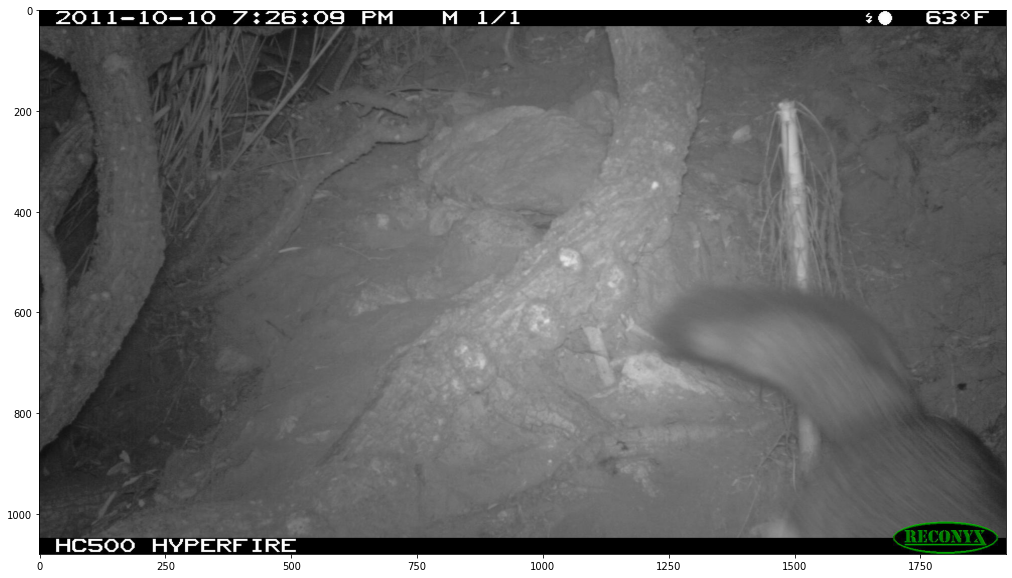

In [3]:
img_path = '../darknet_data/obj/validation_00000100.jpg'
img = cv2.imread(img_path)
plot(img)

In [4]:
config_file = '../Darknet_Data/darknet_yolov4.cfg'
data_file = '../darknet_data/obj.data'
weight_file = '../Darknet_Data/yolov4-custom_best.weights'

In [5]:
network, class_names, class_colors = darknet.load_network(
    config_file, data_file, weight_file, batch_size=1
)

 0 : compute_capability = 750, cudnn_half = 0, GPU: NVIDIA GeForce GTX 1650 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304 x 128 ->  304 x 304 x  64 1.514 BF
  11 conv  

 115 conv   1024       3 x 3/ 1     19 x  19 x 512 ->   19 x  19 x1024 3.407 BF
 116 conv    512       1 x 1/ 1     19 x  19 x1024 ->   19 x  19 x 512 0.379 BF
 117 conv    256       1 x 1/ 1     19 x  19 x 512 ->   19 x  19 x 256 0.095 BF
 118 upsample                 2x    19 x  19 x 256 ->   38 x  38 x 256
 119 route  85 		                           ->   38 x  38 x 512 
 120 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 121 route  120 118 	                           ->   38 x  38 x 512 
 122 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 123 conv    512       3 x 3/ 1     38 x  38 x 256 ->   38 x  38 x 512 3.407 BF
 124 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 125 conv    512       3 x 3/ 1     38 x  38 x 256 ->   38 x  38 x 512 3.407 BF
 126 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 127 conv    128       1 x 1/ 1     38 x  38 x 256 ->   38 x  38 x 128 0.09

 Try to load cfg: ../Darknet_Data/darknet_yolov4.cfg, weights: ../Darknet_Data/yolov4-custom_best.weights, clear = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
 Try to load weights: ../Darknet_Data/yolov4-custom_best.weights 


In [6]:
width = darknet.network_width(network)
height = darknet.network_height(network)
darknet_image = darknet.make_image(width, height, 3)

In [7]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image, (width, height))

In [8]:
darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())

-701874976

In [9]:
detections = darknet.detect_image(network, class_names, darknet_image, thresh=0.25)

In [10]:
detections

[('fox',
  '87.9',
  (489.93768310546875,
   439.47125244140625,
   251.35369873046875,
   273.8580322265625))]

# Test

In [11]:
config_file = '../Darknet_Data/darknet_yolov4.cfg'
data_file = '../darknet_data/obj.data'
weight_file = '../Darknet_Data/yolov4-custom_best.weights'

network, class_names, class_colors = darknet.load_network(config_file, data_file, weight_file, batch_size=1)

 0 : compute_capability = 750, cudnn_half = 0, GPU: NVIDIA GeForce GTX 1650 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304 x 128 ->  304 x 304 x  64 1.514 BF
  11 conv  

 115 conv   1024       3 x 3/ 1     19 x  19 x 512 ->   19 x  19 x1024 3.407 BF
 116 conv    512       1 x 1/ 1     19 x  19 x1024 ->   19 x  19 x 512 0.379 BF
 117 conv    256       1 x 1/ 1     19 x  19 x 512 ->   19 x  19 x 256 0.095 BF
 118 upsample                 2x    19 x  19 x 256 ->   38 x  38 x 256
 119 route  85 		                           ->   38 x  38 x 512 
 120 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 121 route  120 118 	                           ->   38 x  38 x 512 
 122 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 123 conv    512       3 x 3/ 1     38 x  38 x 256 ->   38 x  38 x 512 3.407 BF
 124 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 125 conv    512       3 x 3/ 1     38 x  38 x 256 ->   38 x  38 x 512 3.407 BF
 126 conv    256       1 x 1/ 1     38 x  38 x 512 ->   38 x  38 x 256 0.379 BF
 127 conv    128       1 x 1/ 1     38 x  38 x 256 ->   38 x  38 x 128 0.09


 seen 64, trained: 102 K-images (1 Kilo-batches_64) 
Loaded - names_list: ../darknet_data/obj.names, classes = 20 
 Try to load cfg: ../Darknet_Data/darknet_yolov4.cfg, weights: ../Darknet_Data/yolov4-custom_best.weights, clear = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
 Try to load weights: ../Darknet_Data/yolov4-custom_best.weights 


In [8]:
width = darknet.network_width(network)
height = darknet.network_height(network)
darknet_image = darknet.make_image(width, height, 3)

In [10]:
darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())

NameError: name 'image_resized' is not defined

In [1]:
t_ints = (1, 2, 3, 4, 5)

for i in t_ints:
    if i == 3:
        continue
    print(f'Processing integer {i}')

print("Done")

Processing integer 1
Processing integer 2
Processing integer 4
Processing integer 5
Done
